In [23]:
import sys

In [24]:
sys.path.insert(0, "../../src/")

In [25]:
import analysis.common as ac
import analysis.power_drain_manual as ap

In [26]:
reload(ap)

<module 'analysis.power_drain_manual' from '../../src/analysis/power_drain_manual.pyc'>

In [27]:
(iphone_ids, android_ids, phone_labels) = ac.setupPaths()

In [28]:
import emission.core.get_database as edb
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as pydt

In [29]:
display_names = [ac.get_display_name(label) for label in phone_labels]

In [30]:
drain_df_map = {}

In [31]:
drain_df_map["ios.1"] = pd.read_csv("../../results_dec_2015/ucb.sdb.ios.1/power_logs/nd_1449455052.log")
drain_df_map["ios.2"] = pd.read_csv("../../results_dec_2015/ucb.sdb.ios.2/power_logs/noma5m_1449455052.log")
drain_df_map["ios.3"] = pd.read_csv("../../results_dec_2015/ucb.sdb.ios.3/power_logs/geo100m-ma5m_1449455052.log")

In [32]:
drain_df_map["android.1"] = pd.read_csv("../../results_dec_2015/ucb.sdb.android.1/power_logs/nd_manual_1449455052.log")
drain_df_map["android.2"] = pd.read_csv("../../results_dec_2015/ucb.sdb.android.2/power_logs/noma2s_manual_1449455052.log")
drain_df_map["android.3"] = pd.read_csv("../../results_dec_2015/ucb.sdb.android.3/power_logs/geo100m-ma2s_manual_1449455052.log")

In [33]:
regime_map = {}

In [34]:
regime_map["ios.1"] = "nd"
regime_map["ios.2"] = "mafs"
regime_map["ios.3"] = "geo-mafs"

In [35]:
regime_map["android.1"] = "nd"
regime_map["android.2"] = "mafs"
regime_map["android.3"] = "geo-mafs"

In [36]:
for drain_df in drain_df_map.values():
    drain_df["fmt_time"] = drain_df.ts.map(lambda(t): pydt.datetime.fromtimestamp(t))

In [37]:
drain_df

key            ts  value                fmt_time
0   battery_level  1.449455e+09    100 2015-12-06 18:24:12.850
1   battery_level  1.449457e+09    100 2015-12-06 18:53:54.880
2   battery_level  1.449459e+09    100 2015-12-06 19:36:01.080
3   battery_level  1.449461e+09    100 2015-12-06 20:05:49.280
4   battery_level  1.449463e+09    100 2015-12-06 20:39:32.350
5   battery_level  1.449503e+09     98 2015-12-07 07:36:52.640
6   battery_level  1.449505e+09     97 2015-12-07 08:15:47.930
7   battery_level  1.449507e+09     97 2015-12-07 08:43:18.410
8   battery_level  1.449508e+09     96 2015-12-07 09:13:49.610
9   battery_level  1.449510e+09     96 2015-12-07 09:48:15.650
10  battery_level  1.449512e+09     95 2015-12-07 10:16:17.250
11  battery_level  1.449514e+09     95 2015-12-07 10:47:44.150
12  battery_level  1.449516e+09     95 2015-12-07 11:17:25.190
13  battery_level  1.449518e+09     94 2015-12-07 11:53:58.440
14  battery_level  1.449520e+09     94 2015-12-07 12:31:22.410
15  battery_level  1.449522e+09     92 2015-12-07 13:07:30.870
16  battery_level  1.449525e+09     92 2015-12-07 13:43:39.610
17  battery_level  1.449526e+09     91 2015-12-07 14:06:23.640
18  battery_level  1.449528e+09     91 2015-12-07 14:45:31.360
19  battery_level  1.449531e+09     90 2015-12-07 15:29:44.920
20  battery_level  1.449532e+09     90 2015-12-07 15:46:15.090
21  battery_level  1.449535e+09     88 2015-12-07 16:29:18.360
22  battery_level  1.449536e+09     87 2015-12-07 16:56:01.680
23  battery_level  1.449537e+09     86 2015-12-07 17:15:47.380
24  battery_level  1.449540e+09     84 2015-12-07 17:57:54.460
25  battery_level  1.449544e+09     84 2015-12-07 19:01:33.870

In [38]:
drain_df_map['android.1']

key            ts  value                fmt_time
0   battery_level  1.449455e+09    100 2015-12-06 18:24:12.850
1   battery_level  1.449457e+09    100 2015-12-06 18:53:54.880
2   battery_level  1.449459e+09    100 2015-12-06 19:36:01.080
3   battery_level  1.449461e+09    100 2015-12-06 20:05:49.280
4   battery_level  1.449463e+09    100 2015-12-06 20:39:32.350
5   battery_level  1.449503e+09     96 2015-12-07 07:36:52.640
6   battery_level  1.449505e+09     96 2015-12-07 08:15:47.930
7   battery_level  1.449507e+09     96 2015-12-07 08:43:18.410
8   battery_level  1.449508e+09     95 2015-12-07 09:13:49.610
9   battery_level  1.449510e+09     95 2015-12-07 09:48:15.650
10  battery_level  1.449512e+09     95 2015-12-07 10:16:17.250
11  battery_level  1.449514e+09     95 2015-12-07 10:47:44.150
12  battery_level  1.449516e+09     94 2015-12-07 11:17:25.190
13  battery_level  1.449518e+09     94 2015-12-07 11:53:58.440
14  battery_level  1.449520e+09     94 2015-12-07 12:31:22.410
15  battery_level  1.449522e+09     93 2015-12-07 13:07:30.870
16  battery_level  1.449525e+09     93 2015-12-07 13:43:39.610
17  battery_level  1.449526e+09     93 2015-12-07 14:06:23.640
18  battery_level  1.449528e+09     93 2015-12-07 14:45:31.360
19  battery_level  1.449531e+09     92 2015-12-07 15:29:44.920
20  battery_level  1.449532e+09     92 2015-12-07 15:46:15.090
21  battery_level  1.449535e+09     92 2015-12-07 16:29:18.360
22  battery_level  1.449536e+09     91 2015-12-07 16:56:01.680
23  battery_level  1.449537e+09     91 2015-12-07 17:15:47.380
24  battery_level  1.449540e+09     91 2015-12-07 17:57:54.460
25  battery_level  1.449544e+09     90 2015-12-07 19:01:33.870

In [39]:
ground_truth_df = ap.get_ground_truth_df(drain_df, [[0,1,3,4,5,6,7,13,14,19,
                                                     21,22,23,25], 
                                                    ["moving", "active", "moving", "passive", "active", "moving", "active", "moving", "active", 
                                                     "moving", "active", "moving", "active"]])
ground_truth_df.to_csv("../../ground_truth/compare_mafs.2015-12-06-07/states.summary")

In [40]:
ground_truth_df

start_index      start_ts          start_fmt_time  start_value  end_index  \
0             0  1.449455e+09 2015-12-06 18:24:12.850          100          1   
1             1  1.449457e+09 2015-12-06 18:53:54.880          100          3   
2             3  1.449461e+09 2015-12-06 20:05:49.280          100          4   
3             4  1.449463e+09 2015-12-06 20:39:32.350          100          5   
4             5  1.449503e+09 2015-12-07 07:36:52.640           98          6   
5             6  1.449505e+09 2015-12-07 08:15:47.930           97          7   
6             7  1.449507e+09 2015-12-07 08:43:18.410           97         13   
7            13  1.449518e+09 2015-12-07 11:53:58.440           94         14   
8            14  1.449520e+09 2015-12-07 12:31:22.410           94         19   
9            19  1.449531e+09 2015-12-07 15:29:44.920           90         21   
10           21  1.449535e+09 2015-12-07 16:29:18.360           88         22   
11           22  1.449536e+09 2015-12-07 16:56:01.680           87         23   
12           23  1.449537e+09 2015-12-07 17:15:47.380           86         25   

          end_ts            end_fmt_time  end_value    state  
0   1.449457e+09 2015-12-06 18:53:54.880        100   moving  
1   1.449461e+09 2015-12-06 20:05:49.280        100   active  
2   1.449463e+09 2015-12-06 20:39:32.350        100   moving  
3   1.449503e+09 2015-12-07 07:36:52.640         98  passive  
4   1.449505e+09 2015-12-07 08:15:47.930         97   active  
5   1.449507e+09 2015-12-07 08:43:18.410         97   moving  
6   1.449518e+09 2015-12-07 11:53:58.440         94   active  
7   1.449520e+09 2015-12-07 12:31:22.410         94   moving  
8   1.449531e+09 2015-12-07 15:29:44.920         90   active  
9   1.449535e+09 2015-12-07 16:29:18.360         88   moving  
10  1.449536e+09 2015-12-07 16:56:01.680         87   active  
11  1.449537e+09 2015-12-07 17:15:47.380         86   moving  
12  1.449544e+09 2015-12-07 19:01:33.870         84   active

In [41]:
drain_df_map.keys()

['android.2', 'android.3', 'android.1', 'ios.1', 'ios.2', 'ios.3']

adding annotations for 0, 2015-12-06 18:24:12.850000, 2015-12-06 18:53:54.880000
adding annotations for 1, 2015-12-06 18:53:54.880000, 2015-12-06 20:05:49.280000
adding annotations for 2, 2015-12-06 20:05:49.280000, 2015-12-06 20:39:32.350000
adding annotations for 3, 2015-12-06 20:39:32.350000, 2015-12-07 07:36:52.640000
adding annotations for 4, 2015-12-07 07:36:52.640000, 2015-12-07 08:15:47.930000
adding annotations for 5, 2015-12-07 08:15:47.930000, 2015-12-07 08:43:18.410000
adding annotations for 6, 2015-12-07 08:43:18.410000, 2015-12-07 11:53:58.440000
adding annotations for 7, 2015-12-07 11:53:58.440000, 2015-12-07 12:31:22.410000
adding annotations for 8, 2015-12-07 12:31:22.410000, 2015-12-07 15:29:44.920000
adding annotations for 9, 2015-12-07 15:29:44.920000, 2015-12-07 16:29:18.360000
adding annotations for 10, 2015-12-07 16:29:18.360000, 2015-12-07 16:56:01.680000
adding annotations for 11, 2015-12-07 16:56:01.680000, 2015-12-07 17:15:47.380000
adding annotations for 12,

(<matplotlib.figure.Figure at 0x106194410>,
 array([<matplotlib.axes.AxesSubplot object at 0x10abea3d0>,
        <matplotlib.axes.AxesSubplot object at 0x10b7449d0>], dtype=object))

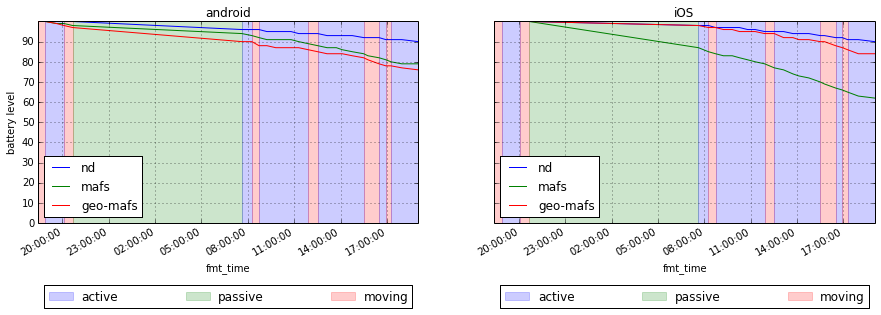

In [42]:
ap.display_drain_over_day(drain_df_map, ground_truth_df, regime_map)

displaying 0, android.1 (nd)
displaying 1, android.2 (mafs)
displaying 2, android.3 (geo-mafs)
displaying 3, ios.1 (nd)
displaying 4, ios.2 (mafs)
displaying 5, ios.3 (geo-mafs)


(<matplotlib.figure.Figure at 0x10aa7ee10>,
 array([<matplotlib.axes.AxesSubplot object at 0x10b9c01d0>,
        <matplotlib.axes.AxesSubplot object at 0x10c348b10>], dtype=object))

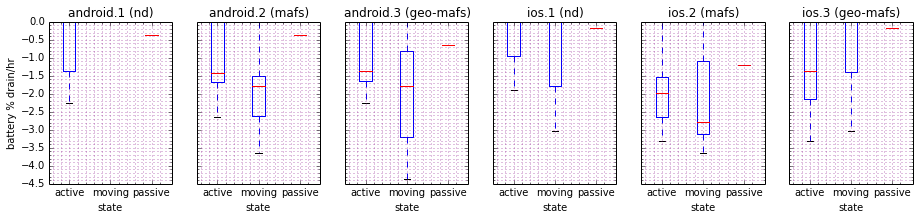

In [43]:
ap.display_per_state_drain(drain_df_map, ground_truth_df, regime_map)

In [44]:
state_diff_df_map = {}
for i, key in enumerate(sorted(drain_df_map.keys())):
    print "displaying %d, %s (%s)" % (i, key, regime_map[key])
    state_diff_df_map[key] = ap.get_state_diff_df(drain_df_map[key], ground_truth_df)
    print state_diff_df_map[key].groupby('state').rate.describe()

displaying 0, android.1 (nd)
state         
active   count    17.000000
         mean     -0.599526
         std       0.879161
         min      -2.245341
         25%      -1.356668
         50%       0.000000
         75%       0.000000
         max       0.000000
moving   count     7.000000
         mean      0.000000
         std       0.000000
         min       0.000000
         25%       0.000000
         50%       0.000000
         75%       0.000000
         max       0.000000
passive  count     1.000000
         mean     -0.365109
         std            NaN
         min      -0.365109
         25%      -0.365109
         50%      -0.365109
         75%      -0.365109
         max      -0.365109
dtype: float64
displaying 1, android.2 (mafs)
state         
active   count    17.000000
         mean     -1.144390
         std       0.927792
         min      -2.639238
         25%      -1.660164
         50%      -1.425065
         75%       0.000000
         max       0.000000